In [4]:
import nn_functions

In [5]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
from jax import nn

import matplotlib.pyplot as plt

from nn_functions import init_network_params, pack_params, layer_sizes
from nn_functions import update_rmsprop, update_sgd
from nn_functions import get_batches, loss, batched_predict

Evaluar la performance de cada optimizador estudiando el valor de la función de costo, la calidad del
ajuste, número de iteraciones necesarias para converger (si es posible). Puede incluir también histogramas de las activaciones de las redes y de los gradientes, y calcular el espectro del Hessiano a lo largo
del entrenamiento.

In [6]:
# Load data
field = jnp.load('field.npy')
field = field - field.mean()
field = field / field.std()
field = jnp.array(field, dtype=jnp.float32)
nx, ny = field.shape
xx = jnp.linspace(-1, 1, nx)
yy = jnp.linspace(-1, 1, ny)
xx, yy = jnp.meshgrid(xx, yy, indexing='ij')
xx = jnp.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1)
ff = field.reshape(-1, 1)

SGD con minibatch

In [ ]:
# Parameters
num_epochs = 100
params = init_network_params(layer_sizes, random.key(0))
params = pack_params(params)
batch_size=32
tol = 1e-2
# optimizer
update = update_sgd
step_size = 0.001

# initialize gradients
xi, yi = next(get_batches(xx, ff, bs=32))
grads = grad(loss)(params, xi, yi)
aux = jnp.square(grads)
log_grads = []

# Training
log_train = []
for epoch in range(num_epochs):
    # Update on each batch
    idxs = random.permutation(random.key(0), xx.shape[0])
    for xi, yi in get_batches(xx[idxs], ff[idxs], bs=batch_size):
        params, aux = update(params, xi, yi, step_size, aux)

   # log_n_grads.append(jnp.linalg.norm(grad(loss)(params, xi, yi)).item())
    
    train_loss = loss(params, xx, ff)
    log_train.append(train_loss.item()) # funcion de costo
    if epoch % 10 == 0:
        log_grads.append(grad(loss)(params, xi, yi))
        grad(loss)(params, xi, yi)
        print(f"Epoch {epoch}, Loss: {train_loss}")

Epoch 0, Loss: 0.2711281180381775
Epoch 10, Loss: 0.12202520668506622
Epoch 20, Loss: 0.08980795741081238
Epoch 30, Loss: 0.08407215774059296
Epoch 40, Loss: 0.08159377425909042
Epoch 50, Loss: 0.07939834892749786
Epoch 60, Loss: 0.07703167200088501
Epoch 70, Loss: 0.07466724514961243
Epoch 80, Loss: 0.07255366444587708
Epoch 90, Loss: 0.0708550438284874


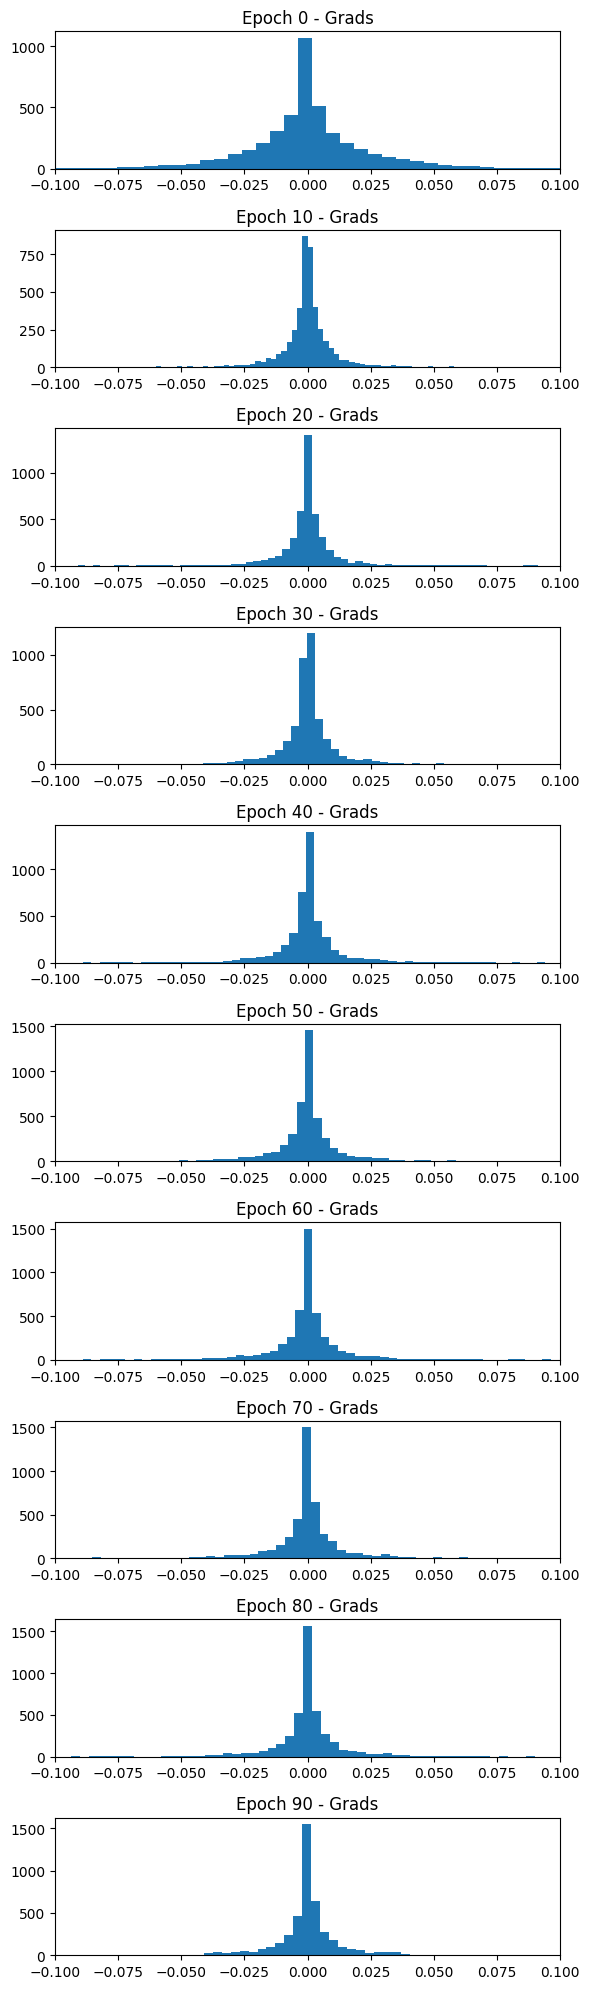

In [21]:

fig, axes = plt.subplots(len(log_grads), 1, squeeze=False, figsize=(6, 2*len(log_grads)))  # log_grads filas, 2 columnas

for i in range(len(log_grads)):
    axes[i, 0].hist(log_grads[i], bins=100)
    axes[i, 0].set_title(f"Epoch {i*10} - Grads")
   # axes[i, 1].hist(log_grads[i], bins=100)
   # axes[i, 1].set_title(f"Epoch {i} - Params")
    
    axes[i, 0].set_xlim(-0.1, 0.1) 

plt.tight_layout()
plt.show()

- histograma de gradientes: componentes o norma? por capa? entendemos que para distintas epochs. (cada tantas epochs calcular el gradiente sobre algunos puntps, lo mismo con el hessiano). ADAM converge mas rapido en histpgrama de gradiente y capas
- histograma de activaciones: idem
- numero de iteracion para converger: con norma del graddiente? en funcion de un mini batch?
- podemos aumentar nro de epochs?
- calidad del ajuste: ver el espectro de fourier, errores en la derivada cada tantos epochs
- hessiano primero guardarlo y despues calcular el espectro


In [15]:
len(grad_k)

4417

In [ ]:
layer_sizes = [2, 64, 64, 1]

hacer histograma por capas

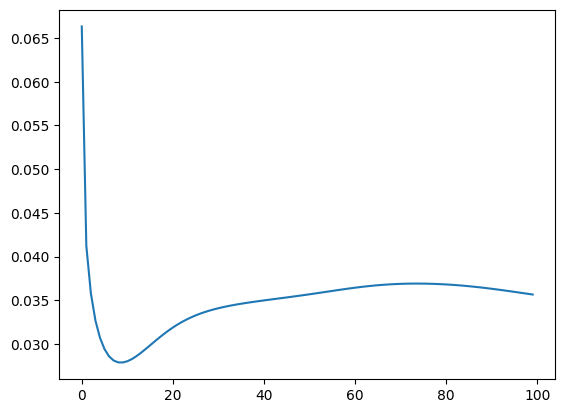

In [22]:
plt.plot(log_n_grads)

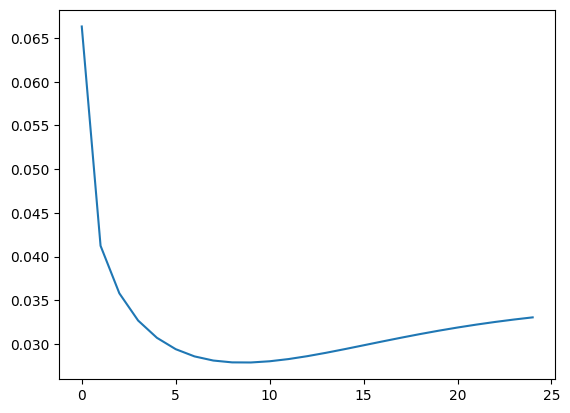

In [13]:
plt.plot(log_n_grads)

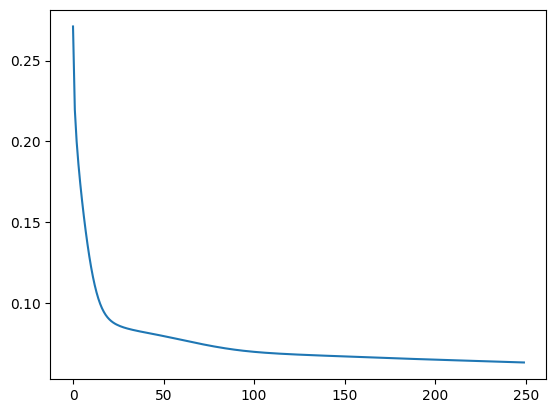

In [10]:
plt.plot(log_train)

In [ ]:
ver el espectro de fourier, errores en la derivada cada tantos epochs, 
cada tantas epochs calcular el gradiente sobre algunos puntps, lo mismo con el hessiano

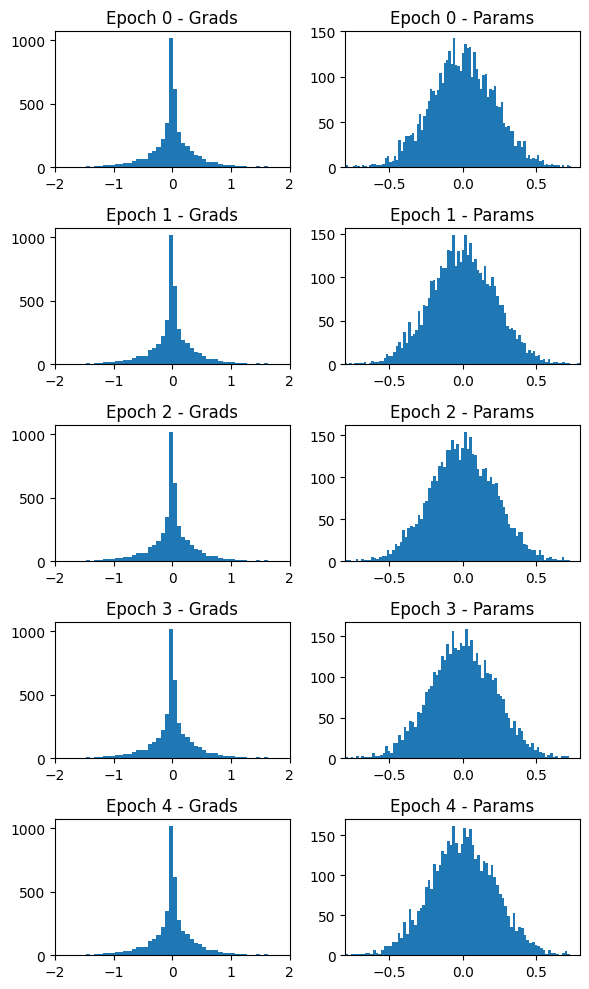

In [19]:
fig, axes = plt.subplots(num_epochs, 2, squeeze=False, figsize=(6, 2*num_epochs))  # num_epochs filas, 2 columnas

for i in range(num_epochs):
    axes[i, 0].hist(log_grads[i], bins=100)
    axes[i, 0].set_title(f"Epoch {i} - Grads")
    axes[i, 1].hist(log_params[i], bins=100)
    axes[i, 1].set_title(f"Epoch {i} - Params")

    axes[i, 0].set_xlim(-2, 2)
    axes[i, 1].set_xlim(-0.8, 0.8)

plt.tight_layout()
plt.show()


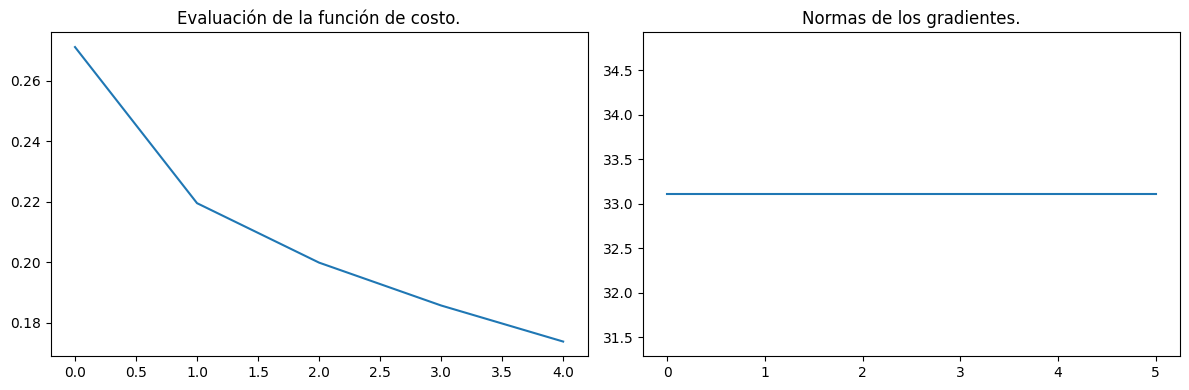

In [31]:
fig, axes = plt.subplots(1, 2, squeeze=False, figsize=(12, 4))

# Plot
axes[0, 0].plot(log_train)
axes[0, 0].set_title(f"Evaluación de la función de costo.")

axes[0, 1].plot(log_n_grads)
axes[0, 1].set_title(f"Normas de los gradientes.")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Simulación')

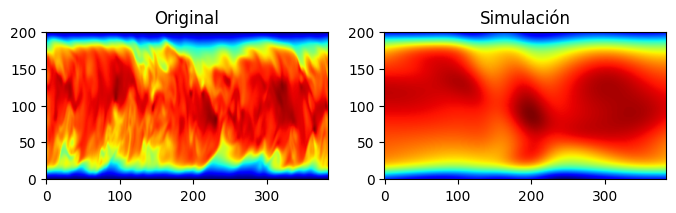

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].imshow(ff.reshape((nx, ny)).T, origin='lower', cmap='jet')
axes[0].set_title(f"Original")
axes[1].imshow(batched_predict(params, xx).reshape((nx, ny)).T, origin='lower', cmap='jet')
axes[1].set_title(f"Simulación")

In [ ]:



# Parameters
num_epochs = 1000
params = init_network_params(layer_sizes, random.key(0))
params = pack_params(params)
log_params = [params]

# optimizer
update = update_sgd
step_size = 0.001

# initialize gradients
xi, yi = next(get_batches(xx, ff, bs=32))
grads = grad(loss)(params, xi, yi)
aux = jnp.square(grads)
log_grads = [grads]

# Training
log_train = []
for epoch in range(num_epochs):
    # Update on each batch
    idxs = random.permutation(random.key(0), xx.shape[0])
    for xi, yi in get_batches(xx[idxs], ff[idxs], bs=32):
        params, aux = update(params, xi, yi, step_size, aux)

    log_params.append(params)
    log_grads.append(grads)

    train_loss = loss(params, xx, ff)
    log_train.append(train_loss)
    print(f"Epoch {epoch}, Loss: {train_loss}")

In [ ]:
lrs = [0.001, 0.01, 0.1]
mbs = [32, 64, 128]

listas = [lrs, mbs]
combinaciones = itertools.product(*listas)

for c in combinaciones: